In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Standard Metropolitan Areas Dataset.csv')

In [ ]:
data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,North-East,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,North-Central,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,North-East,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,South,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,West,80.19


In [ ]:
data['region']=data['region'].replace('North-Central',1)
data['region']=data['region'].replace('North-East',2)
data['region']=data['region'].replace('South',3)
data['region']=data['region'].replace('West',4)

In [ ]:
data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,2,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,1,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,2,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,3,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [ ]:
x=data[['land_area','percent_city','percent_senior','physicians','hospital_beds','graduates','work_force','income','region']] #Keeping independent data's in variable X for training purpose.
y=data['crime_rate'] #Keeping dependent data into Y for testing purpose

In [ ]:
x.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,2
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,1
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,2
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,3
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4


In [ ]:
y.head()

0    75.55
1    56.03
2    41.32
3    67.38
4    80.19
Name: crime_rate, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) #here test_size '0.2' shows that we'll be using 20% of the data for testing purpose & remaining 80% we'll be using for training of our ML model

In [ ]:
x_train.shape

(89, 9)

In [ ]:
y_train.shape

(89,)

In [ ]:
x_test.shape

(10, 9)

In [ ]:
y_test.shape

(10,)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression() #activating LinearRegression

In [ ]:
regression.fit(x_train,y_train) #fit() is used to train the ML model by providing x & y train as i/p variables

LinearRegression()

In [ ]:
prediction=regression.predict(x_test) #predict() is used to predict the o/p from ML model which then gets compare to y_test

In [ ]:
prediction #crime rates will be predicted by ML model

array([47.53597426, 51.12825743, 56.54790168, 44.81386108, 58.73207211,
       58.00529455, 46.36403634, 52.75364477, 58.34242132, 55.19534944])

In [ ]:
regression.score(x,y) #for getting accuracy of the model

0.39344254393757816

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_regression=AdaBoostRegressor()

In [ ]:
ada_regression.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
ada_predictions=ada_regression.predict(x_test)

In [ ]:
ada_predictions

array([54.64583333, 57.37148148, 56.79      , 47.07862069, 64.6196    ,
       58.65566667, 48.99      , 48.86      , 48.09277778, 55.68      ])

In [ ]:
ada_regression.score(x,y)

0.7834540775270868

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

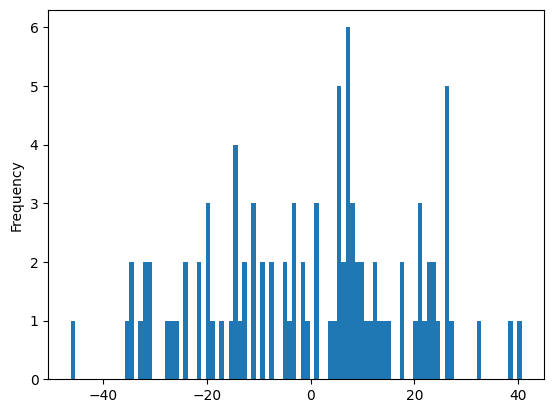

In [ ]:
data['crime_rate'].diff().plot(kind='hist',bins=100)

<Axes: >

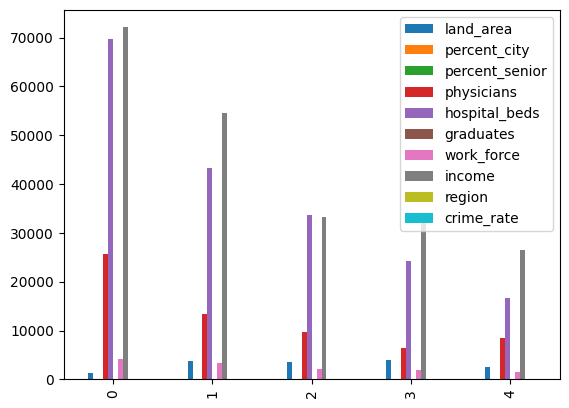

In [ ]:
data.iloc[0:5].plot(kind='bar')

<Axes: xlabel='income', ylabel='crime_rate'>

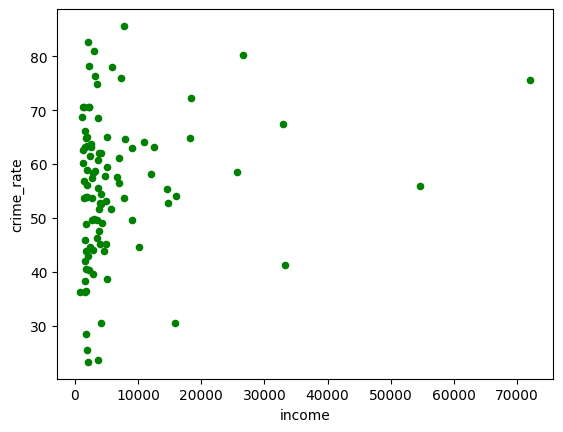

In [ ]:
data.plot.scatter(x='income', y='crime_rate',c='g')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='region', ylabel='crime_rate'>

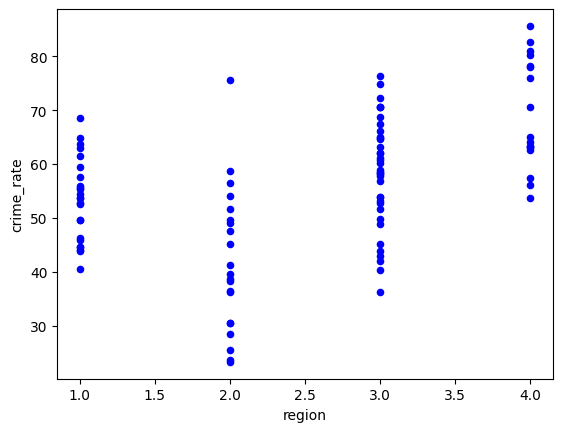

In [ ]:
data.plot.scatter(x='region', y='crime_rate',c='b')

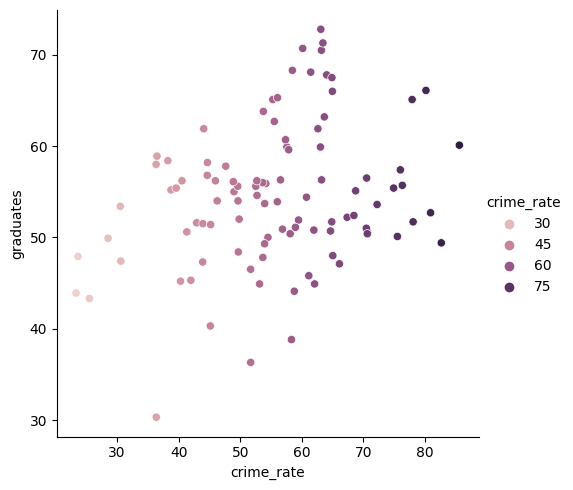

In [ ]:
sns.relplot(x='crime_rate',y='graduates',data=data,hue='crime_rate')

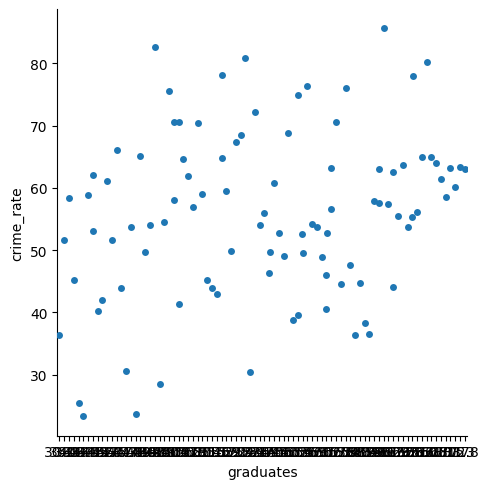

In [ ]:
sns.catplot(x='graduates',y='crime_rate',data=data)